In [38]:
import numpy as np
import tensorflow as tf
import cv2
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [49]:
data = "/content/drive/MyDrive/Thùng hàng"
images = []
labels = []
class_id = 0
label_map = {}
for image_name in os.listdir(data):
    image_path = os.path.join(data, image_name)
    image = Image.open(image_path).convert('RGB')
    image = image.resize((128, 128)) # Tăng kích thước ảnh
    image = np.array(image)

    images.append(image)
    if image_name.split('-')[0] not in label_map:
      label_map[image_name.split('-')[0]] = class_id
      class_id += 1

    label = label_map[image_name.split('-')[0]]
    labels.append(label)
images = np.array(images)
labels = np.array(labels)
print(label_map)

{'Không đạt yêu cầu': 0, 'Đạt yêu cầu': 1}


In [50]:
# Chuẩn hóa giá trị pixel
images = images.astype('float32') / 255.0

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Mã hóa nhãn bằng one-hot encoding
num_classes = len(labels)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(X_train.shape)
print(y_train.shape)

(14, 128, 128, 3)
(14, 18)


In [51]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)), # Corrected input_shape to (128, 128, 3)
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  MaxPooling2D((2, 2)),
  Conv2D(512, (3, 3), activation='relu', padding='same'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(18, activation='relu'),
  Dropout(0.5),
  Dense(18, activation='softmax')
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 18)             │       589,842 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 18)             │           342 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283,016 (4.89 MB)

 Trainable params: 1,283,016 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=25,validation_data=(X_test, y_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.8871 - val_accuracy: 0.5000 - val_loss: 2.0885
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 2.1071 - val_accuracy: 0.5000 - val_loss: 1.5741
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2143 - loss: 2.6730 - val_accuracy: 0.5000 - val_loss: 1.2622
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 1.7646 - val_accuracy: 0.5000 - val_loss: 1.4084
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2143 - loss: 1.9581 - val_accuracy: 0.5000 - val_loss: 1.5264
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 1.7425 - val_accuracy: 0.5000 - val_loss: 1.5209
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3571 - loss: 1.7327 - val_accuracy: 0.5000 - val_loss: 1.3360
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4286 - loss: 1.6088 - val_accuracy: 0.5000 - val_loss: 1.1249
Epoch 9/25
1

In [53]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f'độ chính xác : {int(accuracy*100)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5000 - loss: 0.8013
độ chính xác : 50%


In [54]:
model.save("NLP.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
dự đoán là: Không đạt yêu cầu
dự đoán là: Đạt yêu cầu


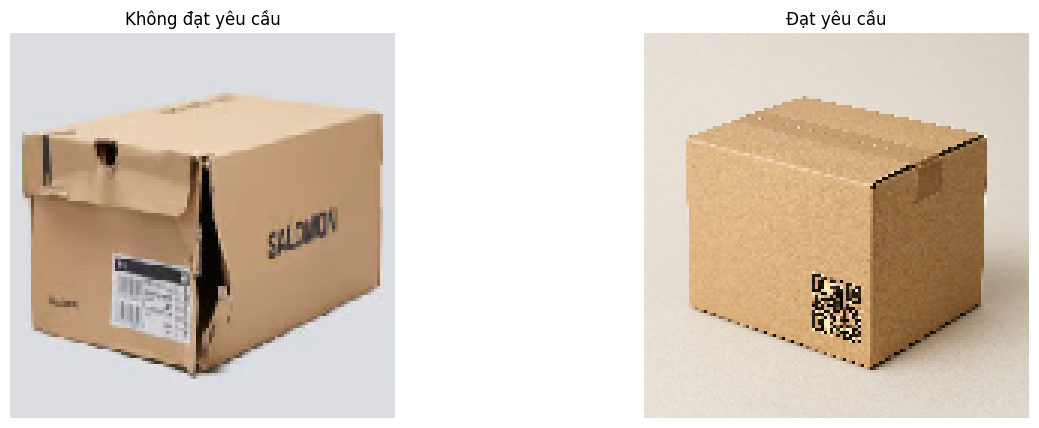

In [55]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

model = load_model('NLP.h5')

# Change target size to (128, 128)
img1 = image.load_img('/content/drive/MyDrive/Thùng hàng/Không đạt yêu cầu-2.png', target_size=(128, 128))
img2 = image.load_img('/content/drive/MyDrive/Thùng hàng/Đạt yêu cầu-3.png', target_size=(128, 128))


img_array1 = image.img_to_array(img1) / 255
img_array2 = image.img_to_array(img2) / 255


img_flatten1 = img_array1.reshape((1, 128, 128, 3)) # Change reshape to (1, 128, 128, 3)
img_flatten2 = img_array2.reshape((1, 128, 128, 3))


prediction1 = model.predict(img_flatten1)
prediction2 = model.predict(img_flatten2)


class_names_list = ['Không đạt yêu cầu','Đạt yêu cầu']
predicted_index1 = np.argmax(prediction1) # Lấy chỉ số của lớp có xác suất cao nhất
predicted_index2 = np.argmax(prediction2)


predicted_class1 = class_names_list[predicted_index1] # Sử dụng chỉ số để lấy tên lớp
predicted_class2 = class_names_list[predicted_index2]



plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) #  hàng,  cột, vị trí
plt.imshow(img1, cmap='gray') # Hiển thị ảnh
plt.title(predicted_class1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray') # Hiển thị ảnh
plt.title(predicted_class2)
plt.axis('off')


print('dự đoán là:', predicted_class1) # In ra tên lớp dự đoán
print('dự đoán là:', predicted_class2)
